In [1]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [42]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, desc

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")
Base = automap_base()

In [5]:
# reflect an existing database into a new model
Base.prepare(engine, reflect = True)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
dates = session.query(Measurement.date).all()
print(max(dates))



('2017-08-23',)


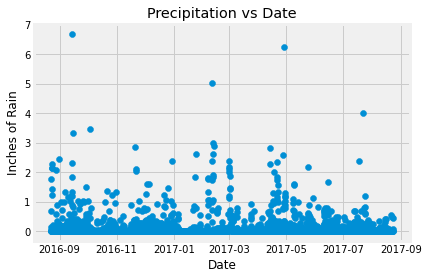

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
# Perform a query to retrieve the data and precipitation scores
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data

last_year_date = '2016-08-23'
results = session.query(Measurement).where(Measurement.date >= last_year_date).all()

dates, stations, tobs, precipitation = ([] for i in range(4))

for row in results:
    dates.append(row.date)
    stations.append(row.station)
    tobs.append(row.tobs)
    precipitation.append(row.prcp)


hawaii_df = pd.DataFrame(columns = ["dates","stations", 'tobs','precipitation'])
hawaii_df["dates"] = dates
hawaii_df["dates"] = pd.to_datetime(hawaii_df["dates"])
hawaii_df["stations"] = stations
hawaii_df["tobs"] = tobs
hawaii_df["precipitation"] = precipitation
complete_hawaii_df = hawaii_df.fillna(0)
complete_hawaii_df.sort_values(by="dates")
plt.scatter(complete_hawaii_df["dates"], complete_hawaii_df["precipitation"])
plt.title("Precipitation vs Date")
plt.xlabel("Date")
plt.ylabel("Inches of Rain")
plt.show()
















In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
complete_hawaii_df["precipitation"].describe()

count    2230.000000
mean        0.160664
std         0.442067
min         0.000000
25%         0.000000
50%         0.010000
75%         0.110000
max         6.700000
Name: precipitation, dtype: float64

# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(Measurement.station).distinct()
for station in station_count:
    print(station)

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [47]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station,func.count(Measurement.station)).group_by(Measurement.station).order_by(desc(func.count(Measurement.station)))

for count in active_stations:
    print(count)

('USC00519281', 2772)
('USC00519397', 2724)
('USC00513117', 2709)
('USC00519523', 2669)
('USC00516128', 2612)
('USC00514830', 2202)
('USC00511918', 1979)
('USC00517948', 1372)
('USC00518838', 511)


In [59]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest_temp = session.query(func.min(Measurement.tobs),func.max(Measurement.tobs),func.avg(Measurement.tobs)).where(Measurement.station == 'USC00519281')
for low_temp in lowest_temp:
    print(f"Minimum temperature: {low_temp[0]} F, Maximum temperature: {low_temp[1]} F, Average temperature: {low_temp[2]} F")

Minimum temperature: 54.0 F, Maximum temperature: 85.0 F, Average temperature: 71.66378066378067 F


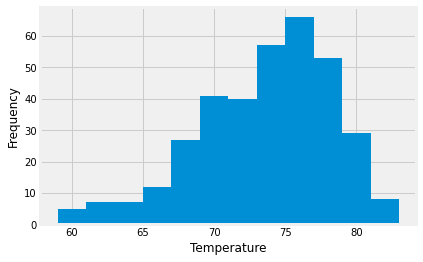

In [77]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
station_tobs = []
station_dates = []
station_results = session.query(Measurement).where(Measurement.station == 'USC00519281').where(Measurement.date >= last_year_date)
for result in station_results:
    station_tobs.append(result.tobs)
    station_dates.append(result.date)
station_df = pd.DataFrame(columns = ["Date", "Temperature"])
station_df["Date"] = station_dates
station_df["Temperature"] = station_tobs
complete_station_df = station_df.fillna(0)
plt.hist(station_df["Temperature"], bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.show()

# Close session

In [16]:
# Close Session
session.close()